## 1.Import Necessary Libraries

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import warnings
warnings.filterwarnings('ignore')

## 2.Import Data

In [2]:
cars =pd.read_csv('Cars.csv')
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [3]:
cars.tail()

,HP,MPG,VOL,SP,WT
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099
80,236,12.101263,107,139.840817,34.948615


## 3.Data Understanding
### 3.1 Perform Initial Analysis.

In [4]:
cars.shape

(81, 5)

In [5]:
cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [6]:
cars.duplicated().sum()

0

In [7]:
cars.dtypes

HP       int64
MPG    float64
VOL      int64
SP     float64
WT     float64
dtype: object

In [8]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [9]:
cars.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


### 3.2 Assumption Check

#### 1.Linearity 

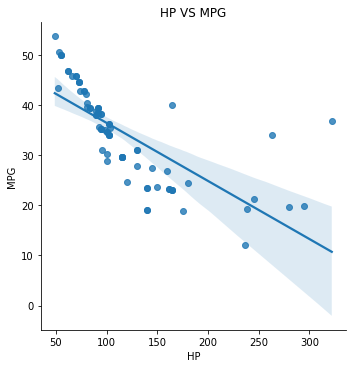

In [10]:
sns.lmplot(x ='HP',y='MPG',data=cars)
plt.title('HP VS MPG')
plt.show()

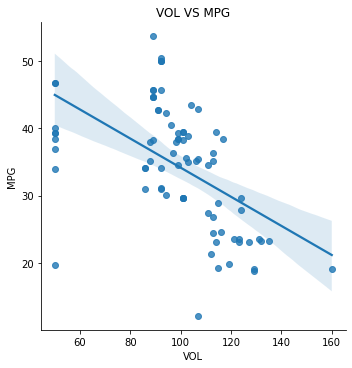

In [11]:
sns.lmplot(x ='VOL',y='MPG',data=cars)
plt.title('VOL VS MPG')
plt.show()

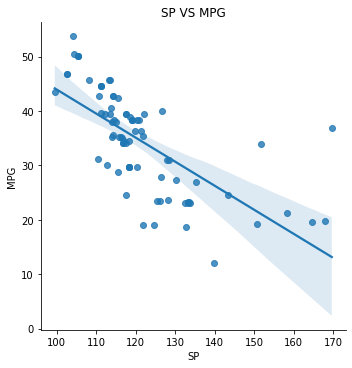

In [12]:
sns.lmplot(x ='SP',y='MPG',data=cars)
plt.title('SP VS MPG')
plt.show()

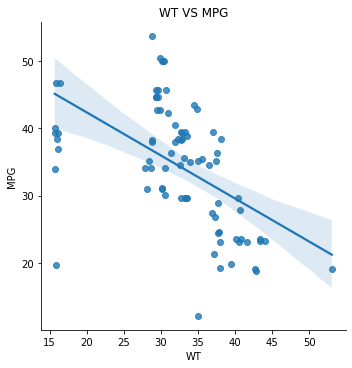

In [13]:
sns.lmplot(x ='WT',y='MPG',data=cars)
plt.title('WT VS MPG')
plt.show()

*Linearity test failed.*

### 3.2 Normality

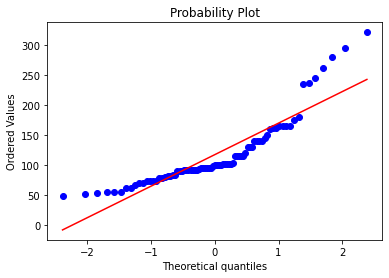

In [14]:
from scipy import stats
stats.probplot(x=cars['HP'],dist='norm',plot=plt)
plt.show()

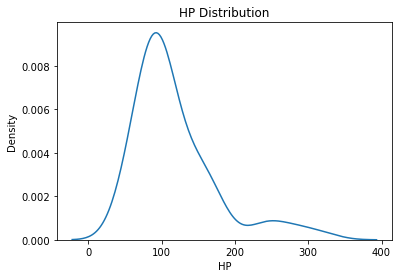

In [15]:
sns.kdeplot(x='HP',data=cars)
plt.title('HP Distribution')
plt.show()

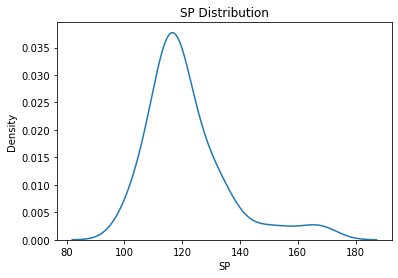

In [16]:
sns.kdeplot(x='SP',data=cars)
plt.title('SP Distribution')
plt.show()

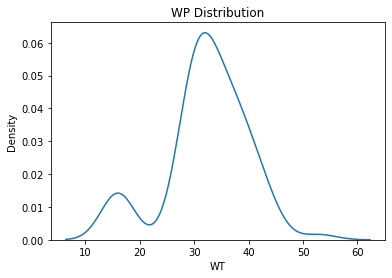

In [17]:
sns.kdeplot(x='WT',data=cars)
plt.title('WP Distribution')
plt.show()

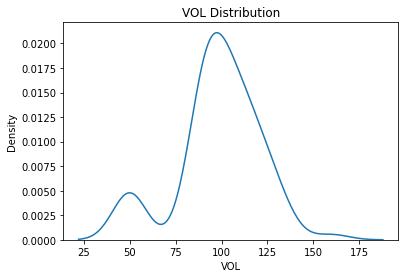

In [18]:
sns.kdeplot(x='VOL',data=cars)
plt.title('VOL Distribution')
plt.show()

### 3. No AutoRegression
- No inputs are showing timedate format.So its passed.


###  4. No Multicollinearity
-  Two techniques:
 - 1.Correlation Matrix
 - 2.VIF Factor

#### 4.1 Correlation Matrix

In [19]:
car=cars.corr().round(2) 
car

,HP,MPG,VOL,SP,WT
HP,1.00,-0.73,0.08,0.97,0.08
MPG,-0.73,1.00,-0.53,-0.69,-0.53
VOL,0.08,-0.53,1.00,0.10,1.00
SP,0.97,-0.69,0.10,1.00,0.10
WT,0.08,-0.53,1.00,0.10,1.00


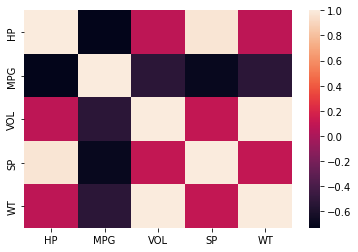

In [20]:
sns.heatmap(car,annot=None)
plt.show()

### 5.Homoscadacity | 6.Zero Residual Mean Check.
this will be performed post Model Training because we need **errors.**

## 4.Model Building

In [21]:
X = cars.drop('MPG',axis=1)
Y= cars[['MPG']]

## 5.Model Training

In [93]:
from sklearn.linear_model import LinearRegression

In [94]:
linear_model =LinearRegression()   #Object #Model Initialization.

In [24]:
linear_model.fit(X,Y)

LinearRegression()

In [25]:
linear_model.intercept_

array([30.67733585])

In [26]:
linear_model.coef_

array([[-0.20544372, -0.33605084,  0.39562692,  0.40057409]])

## 6.Model Testing

In [27]:
Y

,MPG
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232
...,...
76,36.900000
77,19.197888
78,34.000000
79,19.833733


In [28]:
y_pred =linear_model.predict(X)

## 7.Model Evaluation.

In [29]:
errors = Y-y_pred
errors

,MPG
0,10.258747
1,7.624608
2,7.734060
3,3.157963
4,8.331584
...,...
76,15.617904
77,1.298838
78,7.863547
79,7.517122


###  Back to Assumption Check.

### Homoscadacity Check

In [30]:
X

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149
...,...,...,...,...
76,322,50,169.598513,16.132947
77,238,115,150.576579,37.923113
78,263,50,151.598513,15.769625
79,295,119,167.944460,39.423099


In [31]:
errors

,MPG
0,10.258747
1,7.624608
2,7.734060
3,3.157963
4,8.331584
...,...
76,15.617904
77,1.298838
78,7.863547
79,7.517122


In [32]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_x =std_scaler.fit_transform(X)
scaled_x =pd.DataFrame(scaled_x,columns=['HP','VOL','SP','WT'])
scaled_x

,HP,VOL,SP,WT
0,-1.206295,-0.440611,-1.231403,-0.490238
1,-1.100587,-0.305252,-1.140871,-0.261299
2,-1.100587,-0.305252,-1.140871,-0.297993
3,-0.836315,-0.305252,-0.573239,-0.239103
4,-1.135823,-0.305252,-1.211826,-0.338878
...,...,...,...,...
76,3.603442,-2.200268,3.409929,-2.186236
77,2.123523,0.732494,2.060245,0.740025
78,2.563975,-2.200268,2.132755,-2.235028
79,3.127754,0.912972,3.292567,0.941462


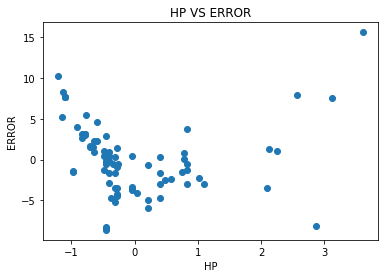

In [33]:
plt.scatter(x=scaled_x['HP'],y=errors)
plt.title('HP VS ERROR')
plt.xlabel('HP')
plt.ylabel('ERROR')
plt.show()

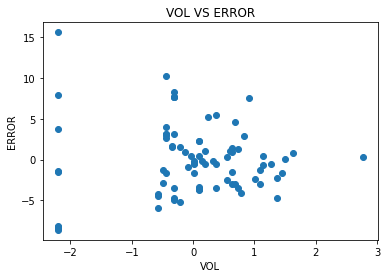

In [34]:
plt.scatter(x=scaled_x['VOL'],y=errors)
plt.title('VOL VS ERROR')
plt.xlabel('VOL')
plt.ylabel('ERROR')
plt.show()

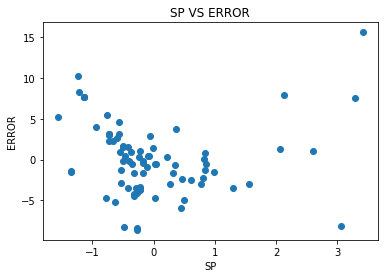

In [35]:
plt.scatter(x=scaled_x['SP'],y=errors)
plt.title('SP VS ERROR')
plt.xlabel('SP')
plt.ylabel('ERROR')
plt.show()

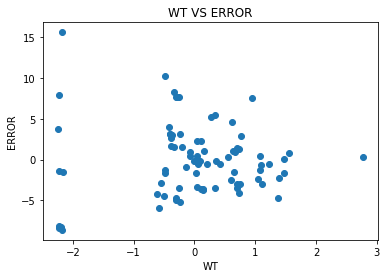

In [36]:
plt.scatter(x=scaled_x['WT'],y=errors)
plt.title('WT VS ERROR')
plt.xlabel('WT')
plt.ylabel('ERROR')
plt.show()

Homoscadacity test failed.

## Zero Residual Mean across the Fitted Line.

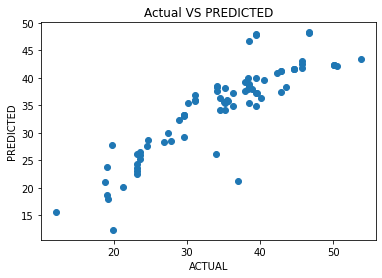

In [37]:
plt.scatter(x=Y,y=y_pred)        #y=actual output #y_pred=predict output
plt.title('Actual VS PREDICTED')
plt.xlabel('ACTUAL')
plt.ylabel('PREDICTED')
plt.show()

#### Zero Residual Mean Failed.

## =========================================================

## Build a  Linear Regression from Statsmodels

In [95]:
import statsmodels.formula.api as smf

In [96]:
linear_model_stats =smf.ols('MPG ~ HP+VOL+SP+WT',data=cars).fit()

## Evaluation Metrics of Linear Regression

In [40]:
print('R2Score     :',linear_model_stats.rsquared.round(4))
print('Adj R2Score :',linear_model_stats.rsquared_adj.round(4))
print('AIC Value   :',linear_model_stats.aic.round(4))
print('BIC Value   :',linear_model_stats.bic.round(4))

R2Score     : 0.7705
Adj R2Score : 0.7585
AIC Value   : 477.9279
BIC Value   : 489.9002


#### Hypothesis Formulation.
- H0 - Input features/This is not significant for prediction.
- Ha - it is a significant
- Level of significant = 5%

In [41]:
linear_model_stats_1 = smf.ols('MPG ~ HP',data=cars).fit()
print('R2Score     :',linear_model_stats_1.rsquared.round(4))
print('Adj R2Score :',linear_model_stats_1.rsquared_adj.round(4))
print('AIC Value   :',linear_model_stats_1.aic.round(4))
print('BIC Value   :',linear_model_stats_1.bic.round(4))
print('P value    :',linear_model_stats_1.pvalues)



R2Score     : 0.5257
Adj R2Score : 0.5197
AIC Value   : 530.7453
BIC Value   : 535.5342
P value    : Intercept    1.211037e-44
HP           1.956490e-14
dtype: float64


In [42]:
linear_model_stats_2 = smf.ols('MPG ~ HP + VOL',data=cars).fit()
print('R2Score     :',linear_model_stats_2.rsquared.round(4))
print('Adj R2Score :',linear_model_stats_2.rsquared_adj.round(4))
print('AIC Value   :',linear_model_stats_2.aic.round(4))
print('BIC Value   :',linear_model_stats_2.bic.round(4))
print('P value    :',linear_model_stats_2.pvalues)



R2Score     : 0.7507
Adj R2Score : 0.7443
AIC Value   : 480.6569
BIC Value   : 487.8403
P value    : Intercept    7.697003e-41
HP           1.203680e-19
VOL          1.654693e-12
dtype: float64


In [43]:
linear_model_stats_3= smf.ols('MPG ~ HP + SP',data=cars).fit()
print('R2Score     :',linear_model_stats_3.rsquared.round(4))
print('Adj R2Score :',linear_model_stats_3.rsquared_adj.round(4))
print('AIC Value   :',linear_model_stats_3.aic.round(4))
print('BIC Value   :',linear_model_stats_3.bic.round(4))
print('P value    :',linear_model_stats_3.pvalues)


R2Score     : 0.5326
Adj R2Score : 0.5207
AIC Value   : 531.5481
BIC Value   : 538.7315
P value    : Intercept    0.208002
HP           0.002129
SP           0.284508
dtype: float64


In [44]:
linear_model_stats_4 = smf.ols('MPG ~ HP +SP + WT',data=cars).fit()
print('R2Score     :',linear_model_stats_4.rsquared.round(4))
print('Adj R2Score :',linear_model_stats_4.rsquared_adj.round(4))
print('AIC Value   :',linear_model_stats_4.aic.round(4))
print('BIC Value   :',linear_model_stats_4.bic.round(4))
print('P value    :',linear_model_stats_4.pvalues)


R2Score     : 0.7695
Adj R2Score : 0.7605
AIC Value   : 476.2993
BIC Value   : 485.8771
P value    : Intercept    5.053995e-02
HP           7.560276e-07
SP           1.089096e-02
WT           1.914892e-13
dtype: float64


In [45]:
linear_model_stats_5 = smf.ols('MPG ~ HP + VOL + WT',data=cars).fit()
print('R2Score     :',linear_model_stats_5.rsquared.round(4))
print('Adj R2Score :',linear_model_stats_5.rsquared_adj.round(4))
print('AIC Value   :',linear_model_stats_5.aic.round(4))
print('BIC Value   :',linear_model_stats_5.bic.round(4))
print('P value    :',linear_model_stats_5.pvalues)



R2Score     : 0.7517
Adj R2Score : 0.742
AIC Value   : 482.3287
BIC Value   : 491.9065
P value    : Intercept    2.513123e-37
HP           1.981859e-19
VOL          3.746742e-01
WT           5.777112e-01
dtype: float64


## ======================================

## Build Linear Regression using sklearn library

In [46]:
X = cars.drop('MPG',axis=1)
y = cars[['MPG']]

In [47]:
X.shape,y.shape

((81, 4), (81, 1))

In [70]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=123)

In [71]:
X_train.shape,y_train.shape

((64, 4), (64, 1))

In [72]:
X_test.shape,y_test.shape

((17, 4), (17, 1))

## Model Trianing

In [48]:
from sklearn.linear_model import LinearRegression
linear_model_sklearn =LinearRegression()
linear_model_sklearn.fit(X,y)

LinearRegression()

### 7.Model Testing | 8.Model Evaluation

#### Training Data

In [50]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [74]:
y_pred_train =linear_model_sklearn.predict(X_train)

In [78]:
mean_squared_error(y_train,y_pred_train)

17.48457107336317

#### Test Data

In [75]:
y_pred_test = linear_model_sklearn.predict(X_test)

In [77]:
mean_squared_error(y_test,y_pred_test)

24.2150520379146

## 8.Model Evaluation

In [52]:
mean_absolute_error(y,y_pred)

3.2679682854207996

### TAKEAWAY:
Here wrt to few datapoints,it is evident that most of the input features are not showing direct linear relationship with output variable.So we have to do some transformations to make to linear.


### Data transformation techniques if the data is *CONTINOUS*
- Log Transformation.
- Square Root Transformation.
- Cube Root Transformation.
- Reciprocal Transformation.
- Boxcox Transformation.
- Standard Scaler.
- Min Max Scaler.
- Robust Scaler.
### Data transformation techniques if the data is *DISCRETE*:
- Label Encoding.
- One Hot Encoding.

In [53]:
cars_1 = cars.copy()
cars_1.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [54]:
cars_1['log_HP'] = np.log(cars_1['HP'])
cars_1['log_VOL'] = np.log(cars_1['VOL'])
cars_1['log_SP'] = np.log(cars_1['SP'])
cars_1['log_WT'] = np.log(cars_1['WT'])
cars_1.head()

,HP,MPG,VOL,SP,WT,log_HP,log_VOL,log_SP,log_WT
0,49,53.700681,89,104.185353,28.762059,3.891820,4.488636,4.646172,3.359057
1,55,50.013401,92,105.461264,30.466833,4.007333,4.521789,4.658344,3.416639
2,55,50.013401,92,105.461264,30.193597,4.007333,4.521789,4.658344,3.407630
3,70,45.696322,92,113.461264,30.632114,4.248495,4.521789,4.731461,3.422049
4,53,50.504232,92,104.461264,29.889149,3.970292,4.521789,4.648816,3.397495


### 3.2 Assumption Check

#### 1.Linearity 

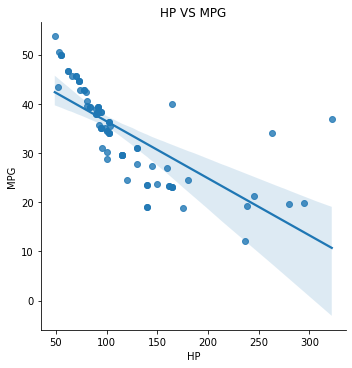

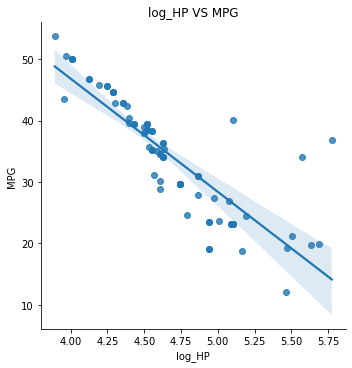

In [55]:
sns.lmplot(x ='HP',y='MPG',data=cars_1)
plt.title('HP VS MPG')
plt.show()
sns.lmplot(x ='log_HP',y='MPG',data=cars_1)
plt.title('log_HP VS MPG')
plt.show()

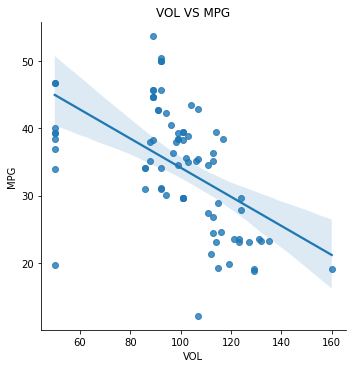

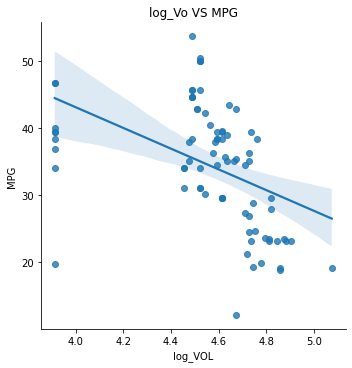

In [56]:
sns.lmplot(x ='VOL',y='MPG',data=cars_1)
plt.title('VOL VS MPG')
plt.show()
sns.lmplot(x ='log_VOL',y='MPG',data=cars_1)
plt.title('log_Vo VS MPG')
plt.show()

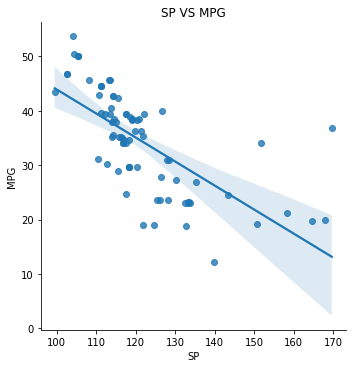

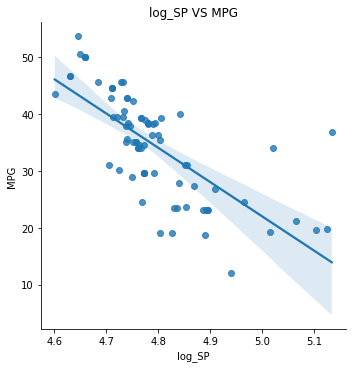

In [57]:
sns.lmplot(x ='SP',y='MPG',data=cars_1)
plt.title('SP VS MPG')
plt.show()
sns.lmplot(x ='log_SP',y='MPG',data=cars_1)
plt.title('log_SP VS MPG')
plt.show()

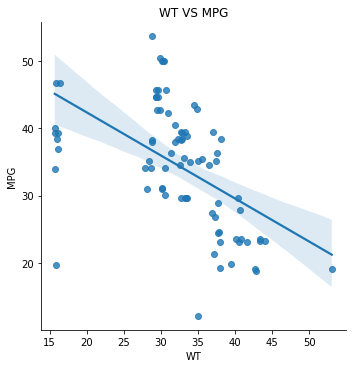

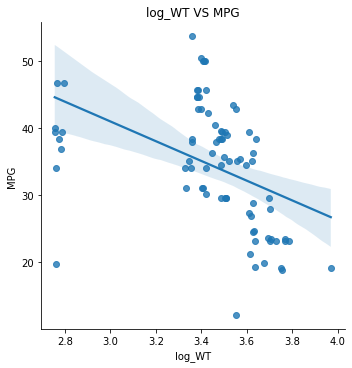

In [58]:
sns.lmplot(x ='WT',y='MPG',data=cars_1)
plt.title('WT VS MPG')
plt.show()
sns.lmplot(x ='log_WT',y='MPG',data=cars_1)
plt.title('log_WT VS MPG')
plt.show()

*Linearity test failed.*

### 3.2 Normality

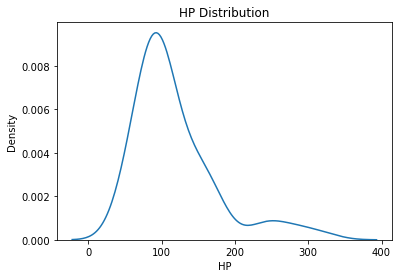

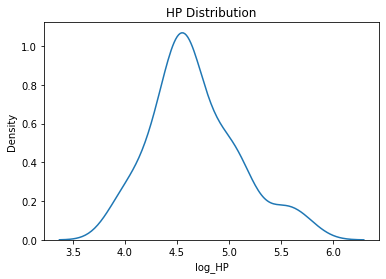

In [59]:
sns.kdeplot(x='HP',data=cars_1)
plt.title('HP Distribution')
plt.show()
sns.kdeplot(x='log_HP',data=cars_1)
plt.title('HP Distribution')
plt.show()

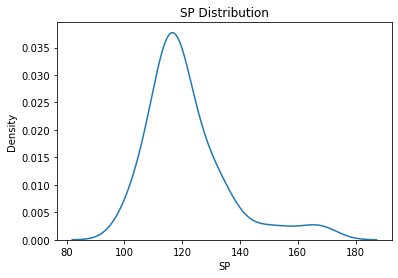

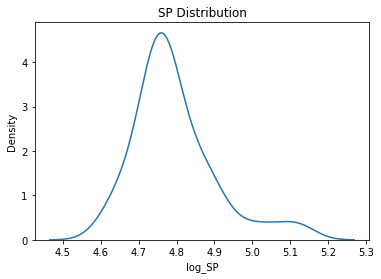

In [60]:
sns.kdeplot(x='SP',data=cars_1)
plt.title('SP Distribution')
plt.show()
sns.kdeplot(x='log_SP',data=cars_1)
plt.title('SP Distribution')
plt.show()

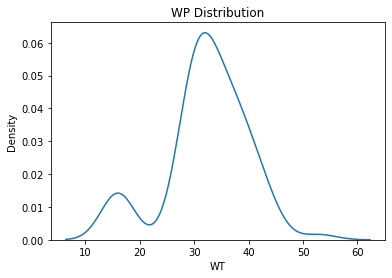

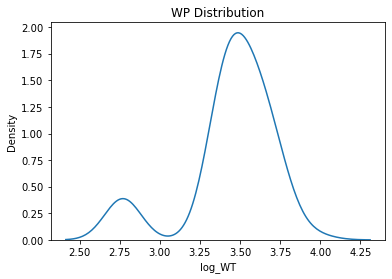

In [61]:
sns.kdeplot(x='WT',data=cars_1)
plt.title('WP Distribution')
plt.show()
sns.kdeplot(x='log_WT',data=cars_1)
plt.title('WP Distribution')
plt.show()

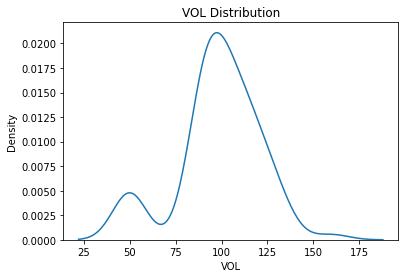

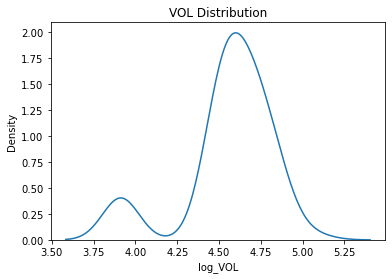

In [62]:
sns.kdeplot(x='VOL',data=cars_1)
plt.title('VOL Distribution')
plt.show()
sns.kdeplot(x='log_VOL',data=cars_1)
plt.title('VOL Distribution')
plt.show()

## Model Building|Training|Evaluation using Statsmodel.

#### Hypothesis Formulation.
- H0 - Input features/This is not significant for prediction.
- Ha - it is a significant
- Level of significant = 5%

In [63]:
linear_model_stats_1 = smf.ols('MPG ~ log_HP',data=cars_1).fit()
print('R2Score     :',linear_model_stats_1.rsquared.round(4))
print('Adj R2Score :',linear_model_stats_1.rsquared_adj.round(4))
print('AIC Value   :',linear_model_stats_1.aic.round(4))
print('BIC Value   :',linear_model_stats_1.bic.round(4))
print('P value    :',linear_model_stats_1.pvalues)



R2Score     : 0.7114
Adj R2Score : 0.7078
AIC Value   : 490.4986
BIC Value   : 495.2875
P value    : Intercept    7.082927e-32
log_HP       5.066177e-23
dtype: float64


In [64]:
linear_model_stats_2 = smf.ols('MPG ~ log_HP + log_VOL',data=cars_1).fit()
print('R2Score     :',linear_model_stats_2.rsquared.round(4))
print('Adj R2Score :',linear_model_stats_2.rsquared_adj.round(4))
print('AIC Value   :',linear_model_stats_2.aic.round(4))
print('BIC Value   :',linear_model_stats_2.bic.round(4))
print('P value    :',linear_model_stats_2.pvalues)



R2Score     : 0.8414
Adj R2Score : 0.8373
AIC Value   : 444.0331
BIC Value   : 451.2165
P value    : Intercept    2.046654e-34
log_HP       3.965778e-29
log_VOL      9.705055e-12
dtype: float64


In [65]:
linear_model_stats_3= smf.ols('MPG ~ log_HP + log_SP',data=cars_1).fit()
print('R2Score     :',linear_model_stats_3.rsquared.round(4))
print('Adj R2Score :',linear_model_stats_3.rsquared_adj.round(4))
print('AIC Value   :',linear_model_stats_3.aic.round(4))
print('BIC Value   :',linear_model_stats_3.bic.round(4))
print('P value    :',linear_model_stats_3.pvalues)


R2Score     : 0.8079
Adj R2Score : 0.803
AIC Value   : 459.5115
BIC Value   : 466.6948
P value    : Intercept    1.612775e-04
log_HP       2.851686e-17
log_SP       1.924455e-08
dtype: float64


In [66]:
linear_model_stats_4 = smf.ols('MPG ~ log_HP +log_SP + log_WT',data=cars_1).fit()
print('R2Score     :',linear_model_stats_4.rsquared.round(4))
print('Adj R2Score :',linear_model_stats_4.rsquared_adj.round(4))
print('AIC Value   :',linear_model_stats_4.aic.round(4))
print('BIC Value   :',linear_model_stats_4.bic.round(4))
print('P value    :',linear_model_stats_4.pvalues)


R2Score     : 0.9116
Adj R2Score : 0.9081
AIC Value   : 398.6808
BIC Value   : 408.2586
P value    : Intercept    6.789992e-04
log_HP       2.357322e-23
log_SP       1.816625e-11
log_WT       1.308910e-14
dtype: float64


In [67]:
linear_model_stats_5 = smf.ols('MPG ~ log_HP + log_VOL + log_WT',data=cars_1).fit()
print('R2Score     :',linear_model_stats_5.rsquared.round(4))
print('Adj R2Score :',linear_model_stats_5.rsquared_adj.round(4))
print('AIC Value   :',linear_model_stats_5.aic.round(4))
print('BIC Value   :',linear_model_stats_5.bic.round(4))
print('P value    :',linear_model_stats_5.pvalues)



R2Score     : 0.8421
Adj R2Score : 0.8359
AIC Value   : 445.6706
BIC Value   : 455.2484
P value    : Intercept    2.136385e-04
log_HP       3.365777e-28
log_VOL      3.819720e-01
log_WT       5.584725e-01
dtype: float64


## ======================================

## Residual Analysis

### Test for normality of Residuals (Q-Q plot)

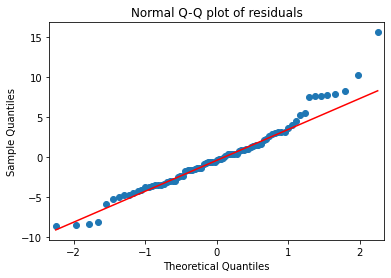

In [98]:
import statsmodels.api as sm
qqplot = sm.qqplot(linear_model_stats.resid,line='q') #Mot of the line should folow,line = 45% to draw the diagonal line
plt.title('Normal Q-Q plot of residuals')
plt.show()

In [101]:
list(np.where(linear_model_stats.resid>10))

[array([ 0, 76], dtype=int64)]

## Residual Vs Regressors.

eval_env: 1


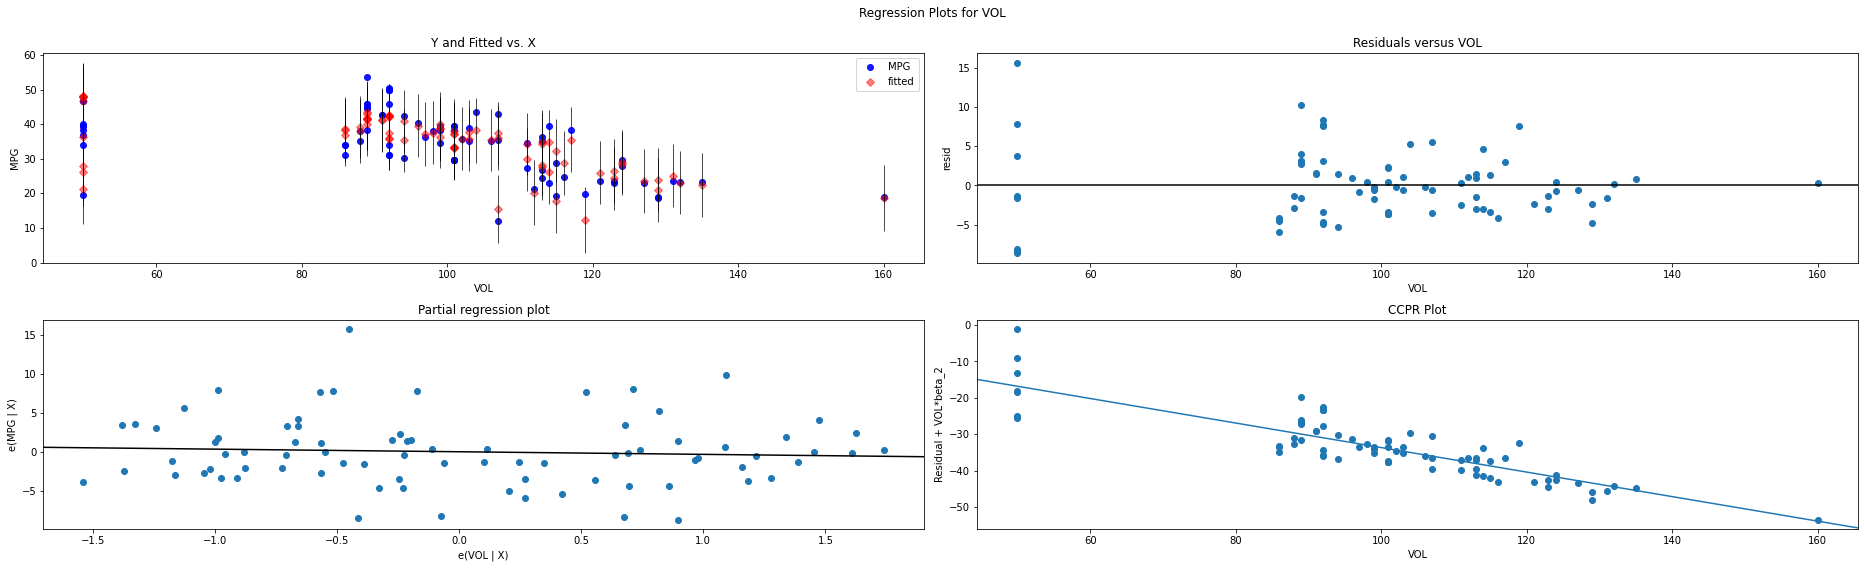

In [105]:
fig = plt.figure(figsize=(26,8))  #it speaks only about one volume
fig = sm.graphics.plot_regress_exog(linear_model_stats,'VOL',fig=fig)
plt.show()

eval_env: 1


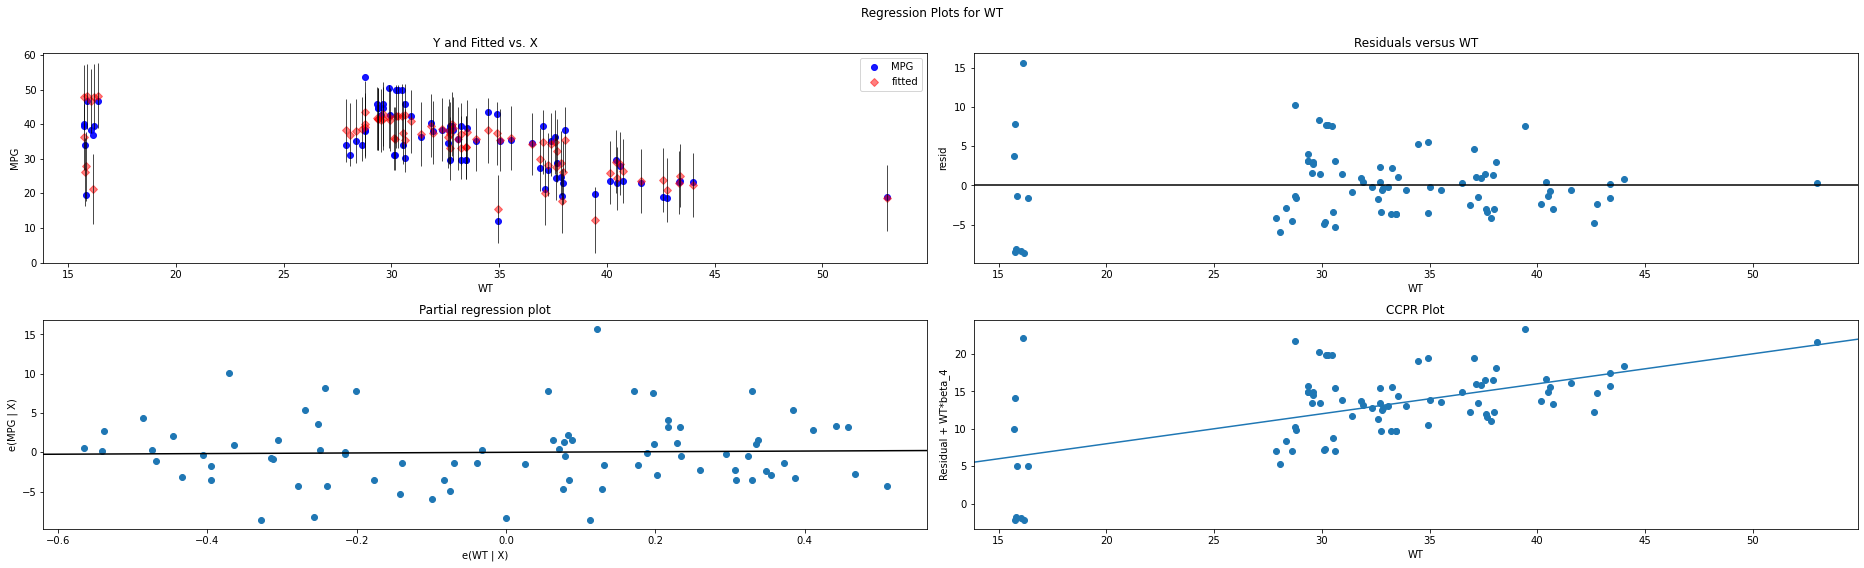

In [99]:
fig = plt.figure(figsize=(26,8))
fig = sm.graphics.plot_regress_exog(linear_model_stats,'WT',fig=fig)
plt.show()

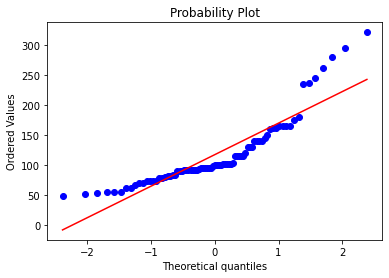

In [68]:
from scipy import stats
stats.probplot(x=cars_1['HP'],dist='norm',plot=plt)
plt.show()

## VIF (Variance Inflation Factor)
- The two factors which are showing very high value.

In [88]:
rsq_hp = smf.ols('HP~SP+WT+VOL',data=cars).fit().rsquared
vif_hp = 1/(1-rsq_hp)
rsq_vol = smf.ols('VOL~HP+SP+WT',data=cars).fit().rsquared
vif_vol = 1/(1-rsq_vol)
sq_wt = smf.ols('WT~HP+SP+VOL',data=cars).fit().rsquared
vif_wt = 1/(1-rsq_vol)
rsq_sp = smf.ols('SP~HP+VOL+WT',data=cars).fit().rsquared
vif_sp = 1/(1-rsq_sp)
#storing vif values in a data frames.
d1 = {'Variables': ['HP','VOL','WT','SP'],'VIF':[vif_hp,vif_vol,vif_wt,vif_sp]}
vif_frame = pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,HP,19.926589
1,VOL,638.806084
2,WT,638.806084
3,SP,20.007639


## Model Deletion Diagnostics
### Detecting Influencers/Outliers.
#### Cook's Distance

In [102]:
model_influence = linear_model_stats.get_influence()
(c,_) = model_influence.cooks_distance

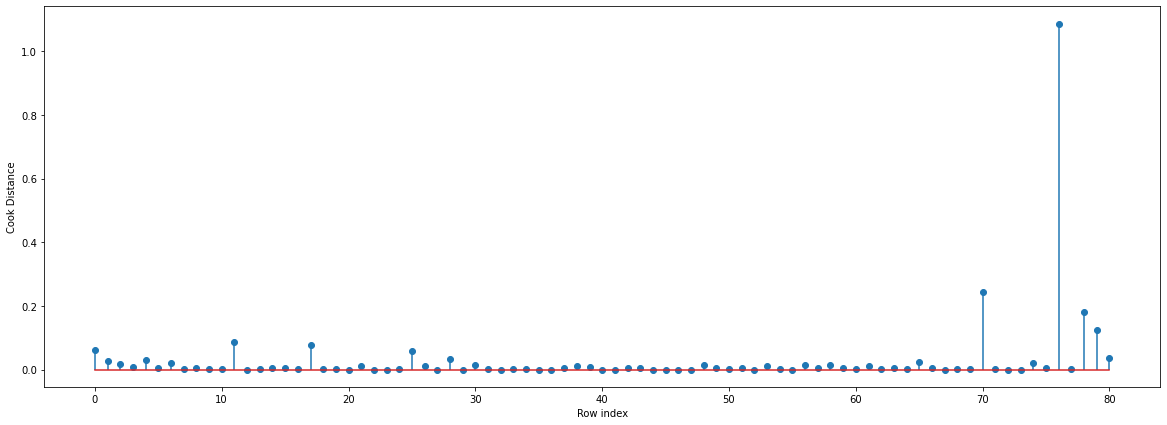

In [104]:
#Plot the influence values using stem plot
plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(cars)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cook Distance')
plt.show()

In [106]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(76, 1.0865193998179983)

## High Influence points

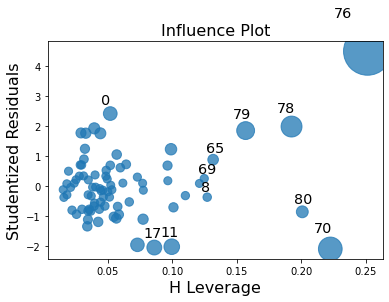

In [107]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(linear_model_stats)
plt.show()

In [108]:
k = cars.shape[1]
n = cars.shape[0]
leverage_cutoff = 3*((k + 1)/n)

##### From the above plot , it is evident that data points 70 and 76 are the influencers

In [110]:
cars[cars.index.isin([70,76])]

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947
